## SciPy and Scikits

NumPy contains much of the functionality required to perform efficient operations in python, but you will soon realize that there is not a great deal of high level functionality implemented in numpy. 

[Scipy](http://docs.scipy.org/doc/scipy/reference/) is the module where you *will* find a great deal of high level functionality that is very useful for day to day scientific computing. 

Some of the very useful submodules that can be found in SciPy are:

* [Linear Algebra](http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
* [Statistics](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
* [Integration](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)
* [Interpolation](http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
* [FFT](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)
* [Optimization](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

For the rest of this notebook we will play around with some of these submodules to see what kind of functionality is available.

In [1]:
%matplotlib inline
from __future__ import print_function, division
import numpy as np

/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: savefig.extension is deprecated and replaced with savefig.format; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### SciPy constants

`scipy.constants` is a convenient compilation of the [2010 CODATA constants](http://www.codata.org).

In [2]:
from scipy import constants as cons
cons.physical_constants

{'Angstrom star': (1.00001495e-10, 'm', 9e-17),
 'Avogadro constant': (6.022140857e+23, 'mol^-1', 7400000000000000.0),
 'Bohr magneton': (9.274009994e-24, 'J T^-1', 5.7e-32),
 'Bohr magneton in Hz/T': (13996245042.0, 'Hz T^-1', 86.0),
 'Bohr magneton in K/T': (0.67171405, 'K T^-1', 3.9e-07),
 'Bohr magneton in eV/T': (5.7883818012e-05, 'eV T^-1', 2.6e-14),
 'Bohr magneton in inverse meters per tesla': (46.68644814,
  'm^-1 T^-1',
  2.9e-07),
 'Bohr radius': (5.2917721067e-11, 'm', 1.2e-20),
 'Boltzmann constant': (1.38064852e-23, 'J K^-1', 7.9e-30),
 'Boltzmann constant in Hz/K': (20836612000.0, 'Hz K^-1', 12000.0),
 'Boltzmann constant in eV/K': (8.6173303e-05, 'eV K^-1', 5e-11),
 'Boltzmann constant in inverse meters per kelvin': (69.503457,
  'm^-1 K^-1',
  4e-05),
 'Compton wavelength': (2.4263102367e-12, 'm', 1.1e-21),
 'Compton wavelength over 2 pi': (3.8615926764e-13, 'm', 1.8e-22),
 'Cu x unit': (1.00207697e-13, 'm', 2.8e-20),
 'Faraday constant': (96485.33289, 'C mol^-1', 0.00

In [3]:
cons.find('electron mass')

['alpha particle-electron mass ratio',
 'deuteron-electron mass ratio',
 'electron mass',
 'electron mass energy equivalent',
 'electron mass energy equivalent in MeV',
 'electron mass in u',
 'helion-electron mass ratio',
 'muon-electron mass ratio',
 'neutron-electron mass ratio',
 'proton-electron mass ratio',
 'tau-electron mass ratio',
 'triton-electron mass ratio']

### Linear Algebra
Scipy has implemented most of the fundamental linear algibra operations that you will need to use.

In [4]:
from scipy import linalg
#matrix inverse
x = np.random.rand(10,10)
xinv = linalg.inv(x)

#eigenvalues, eigenvectors
eigenval, eigenvec = linalg.eig(x)

#determinant
det = linalg.det(x)

#and many more...

In [5]:
from numpy import linalg

In [7]:
from scipy import linalg

### Optimization

Yes, you can fit non-linear functions!

In [9]:
from scipy import optimize

In [10]:
#function to fit must have independent variable as first arg, parameters after that
def func(x, p0, p1, p2):
    
    return p0 + x*p1 + x**2*p2
        

In [19]:
#Generate some data
x = np.linspace(0, 10, 20)
p = [1.0, 2.0, 2.5]
y = func(x, *p) + np.random.randn(20)

In [20]:
def my_func(x, *args, **kwargs):
    
    for arg in args:
        print(arg)

    for kw in kwargs:
        print(kwargs[kw])
    

In [18]:
my_func(x, 'first arg', 'second arg', second_arg='kwarg')

first arg
second arg
kwarg


In [12]:
import matplotlib.pyplot as plt

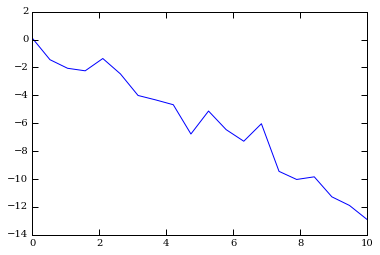

In [13]:
plt.plot(x,y)

In [22]:
x = list(x)

In [23]:
x

[0.0,
 0.52631578947368418,
 1.0526315789473684,
 1.5789473684210527,
 2.1052631578947367,
 2.6315789473684208,
 3.1578947368421053,
 3.6842105263157894,
 4.2105263157894735,
 4.7368421052631575,
 5.2631578947368416,
 5.7894736842105257,
 6.3157894736842106,
 6.8421052631578947,
 7.3684210526315788,
 7.8947368421052628,
 8.4210526315789469,
 8.9473684210526319,
 9.473684210526315,
 10.0]

Original parameters: [1.0, 2.0, 2.5]
Fitted parameters: [ 1.10389582  2.17295906  2.48094809]


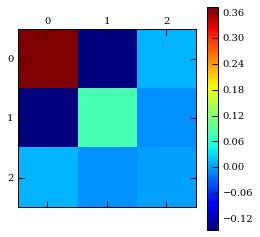

In [27]:
fp, cov = optimize.curve_fit(func, x, y, p0=[0.0, 0.0, 0.0])
print('Original parameters: {0}'.format(arg=p))
print('Fitted parameters: {0}'.format(fp))
plt.matshow(cov)
plt.colorbar()

In [ ]:
plt.plot(x, y, 'd')
plt.plot(x, func(x,*fp))

### Interpolation

In [28]:
from scipy.interpolate import interp1d, UnivariateSpline
# now interpolate onto a much finer grid, using both iterp1d and UnivariateSpline
ix = np.linspace(0, 10, 200)

# list of interpolated values of location at i_times
i1d = interp1d(x, y, kind="cubic")
us = UnivariateSpline(x, y) # a function that will return interpolated values

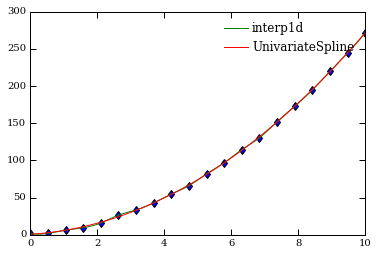

In [30]:
plt.plot(x, y, 'd')
plt.plot(ix, i1d(ix), label='interp1d')
plt.plot(ix, us(ix), label='UnivariateSpline')
plt.legend()
plt.savefig('myplot.png')

### Exercise 1

Explore 2 dimensional interpolation using interpolate.bisplrep and interpolate.bisplev on the following array. Interpolate the below array to 10 times it's fineness.

In [33]:
np.mgrid?

In [31]:
x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

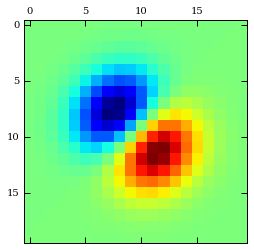

In [42]:
plt.matshow(z)

### Integration

In [43]:
from scipy.integrate import quad

In [44]:
f = lambda x : func(x, p[0], p[1], p[2])
di = quad(f, 10, 20)

In [45]:
print('Definite integral, error : {0}, {1}'.format(di[0], di[1]))

Definite integral, error : 6143.33333333, 6.82047011461e-11


In [46]:
from scipy.integrate import ode
ode?

You can [detect gravitational waves](https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html) with SciPy! 

## Scikit Learn

In [ ]:
from sklearn import datasets, cross_validation, preprocessing, neighbors, metrics, grid_search

boston = datasets.load_boston() #load in a canned data set 
X = boston.data
Y = boston.target
fields = boston.feature_names
print(boston.DESCR)

In [ ]:
subplot(131)
scatter(X[:,11],Y)
subplot(132)
scatter(X[:,10],Y)
subplot(133)
scatter(X[:,9],Y)
tight_layout()

In [ ]:
X_scaled = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X_scaled, Y, test_size=0.5)

In [ ]:
n_neighbors = 5
weights = 'uniform'
reg = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
reg.fit(X_train, Y_train)

In [ ]:
Y_pred = reg.predict(X_test)

# how well did we do?
mse = metrics.mean_squared_error(Y_test,Y_pred)
print(mse)
plot(Y_test,Y_pred - Y_test,'o')
xlabel("True Median House Price ($1,000)")
ylabel("Residual")
hlines(0,min(Y_test),max(Y_test),color="red")

### Exercise 2
Explore the KNN model parameters. See if you can find a combination that minimzes the MSE.

## Exercise Solutions

### Exercise 1

In [38]:
from scipy import interpolate
xnew, ynew = np.mgrid[-1:1:200j, -1:1:200j]
tck = interpolate.bisplrep(x, y, z, s=0)


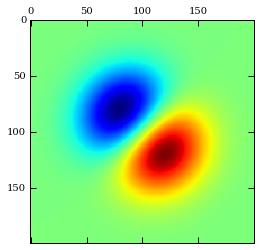

In [40]:
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)
plt.matshow(znew)

### Exercise 2

In [ ]:
params = {'n_neighbors':range(1,5), 'weights':['uniform', 'distance']}
cvreg = grid_search.GridSearchCV(neighbors.KNeighborsRegressor(), params, n_jobs=-1)#n_jobs parameter sets the number of processors
cvreg.fit(X_train, Y_train)

Y_pred = cvreg.predict(X_test)

# how well did we do?
mse = metrics.mean_squared_error(Y_test,Y_pred)
print(mse)
plot(Y_test,Y_pred - Y_test,'o')
xlabel("True Median House Price ($1,000)")
ylabel("Residual")
hlines(0,min(Y_test),max(Y_test),color="red")